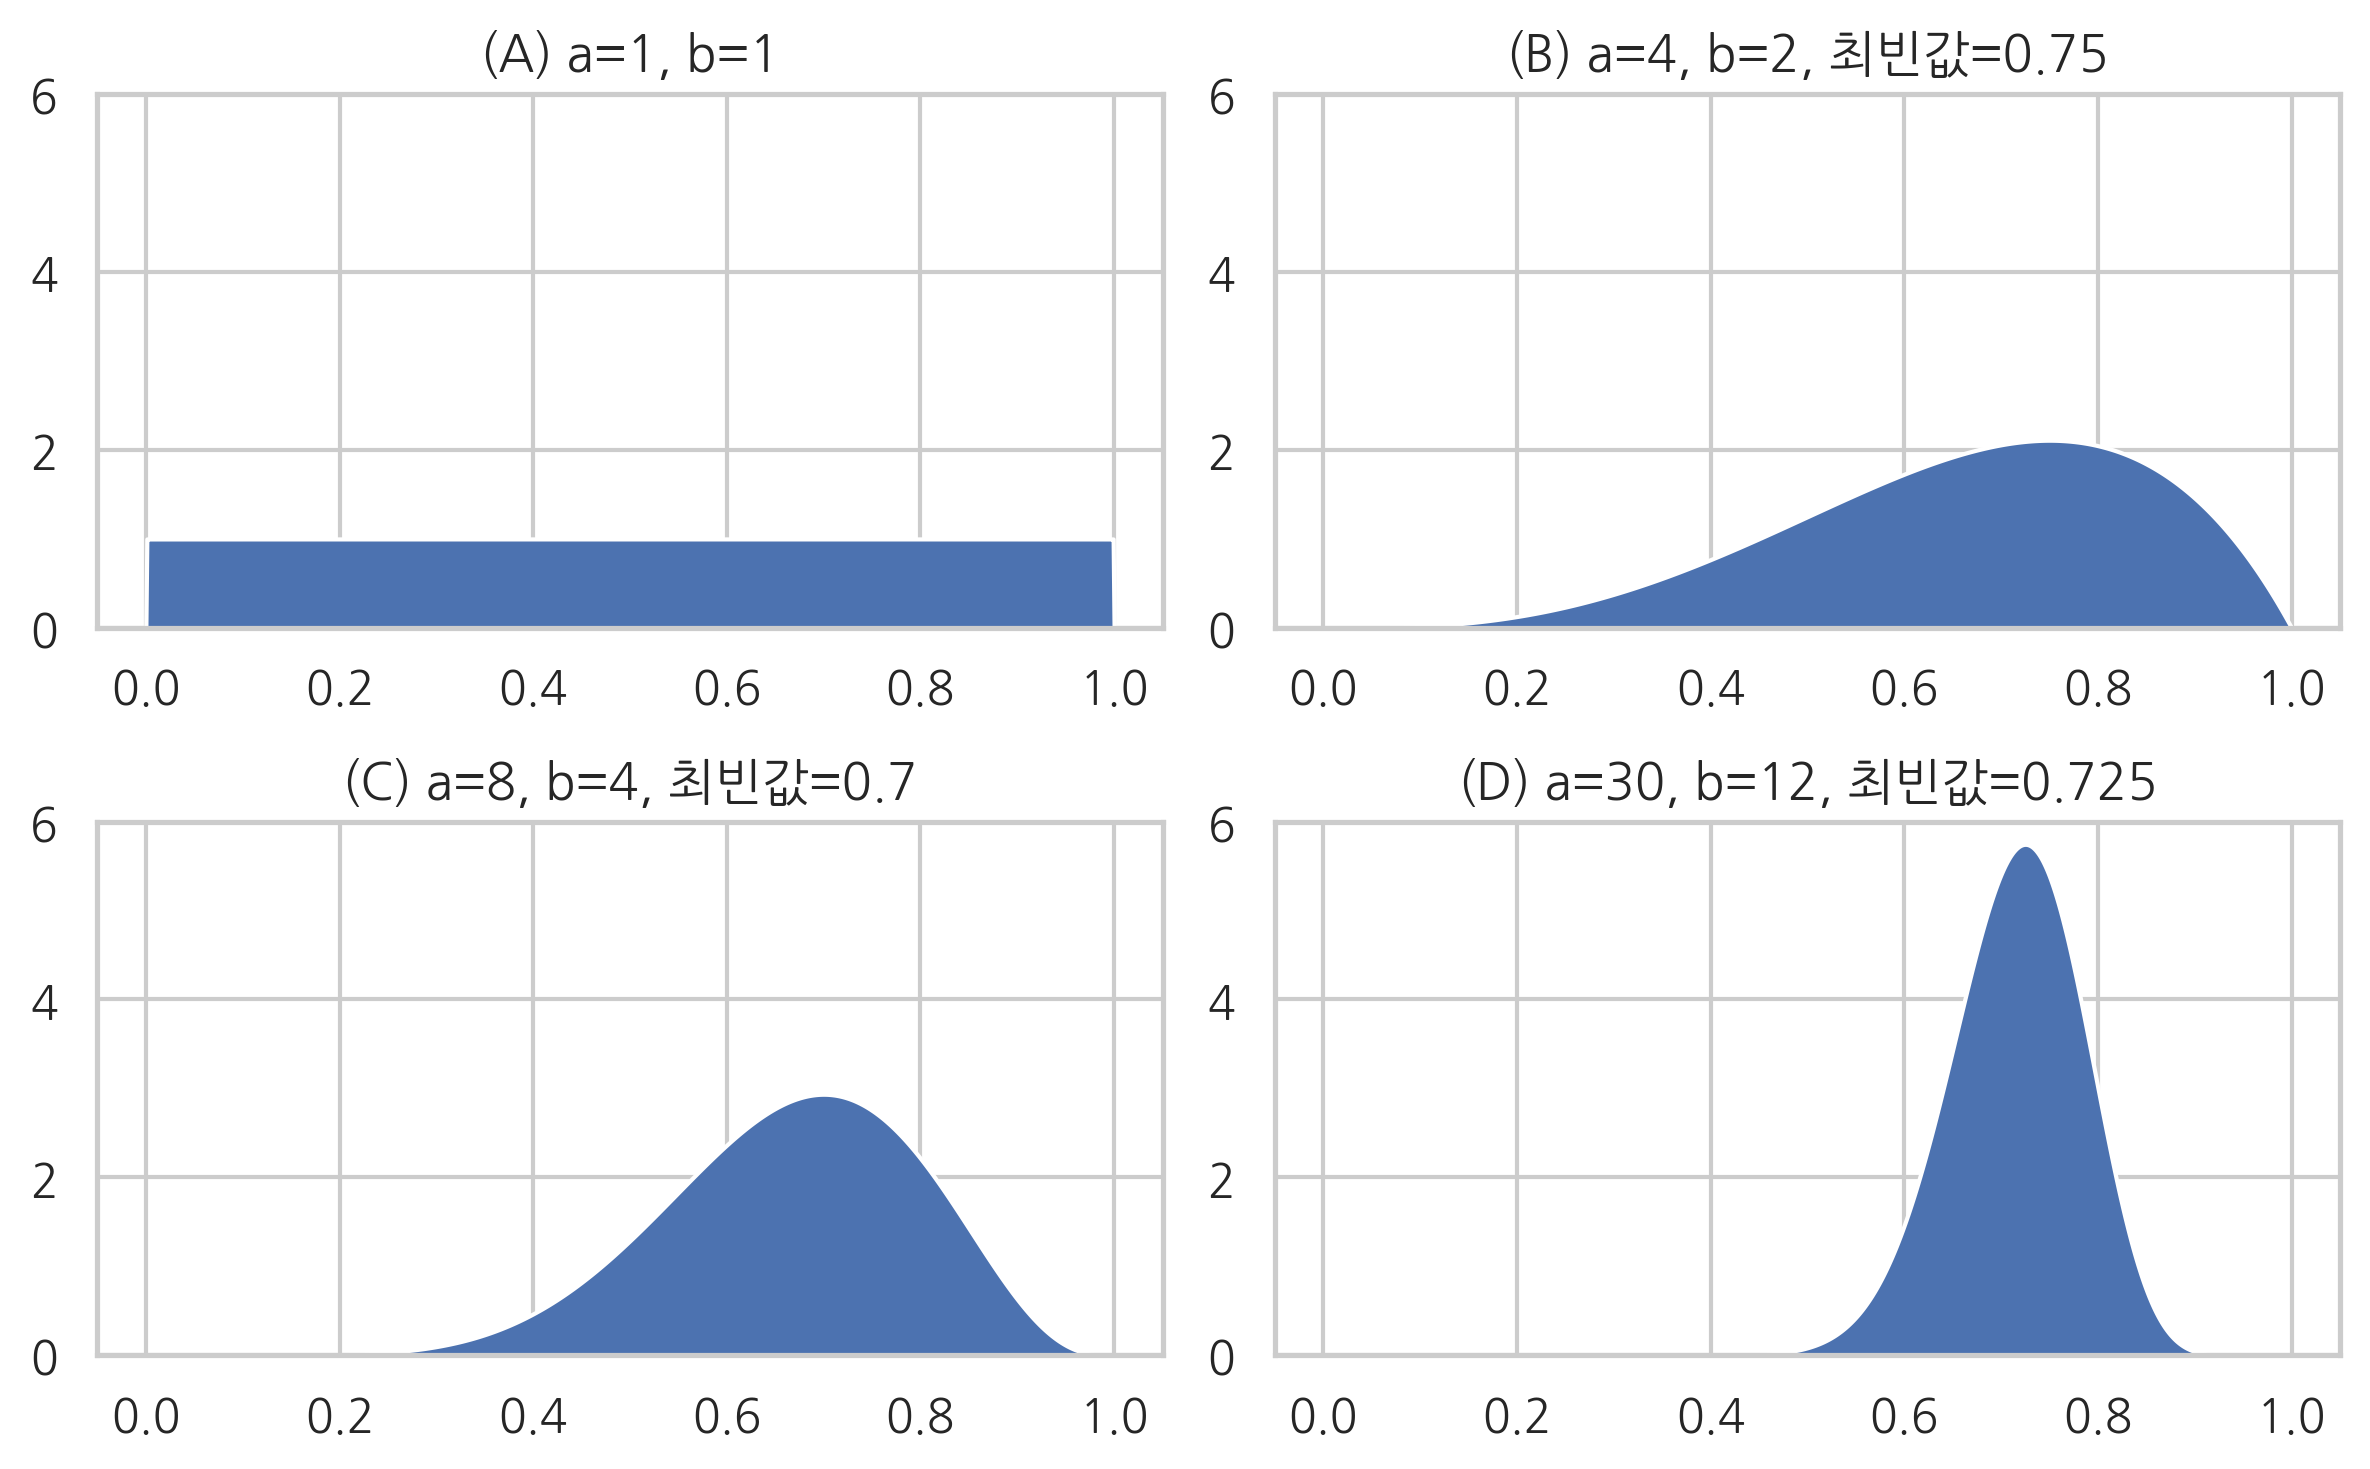

In [1]:
xx = np.linspace(0, 1, 1000)
plt.subplot(221)
plt.fill_between(xx, sp.stats.beta(1.0001, 1.0001).pdf(xx))
plt.ylim(0, 6)
plt.title("(A) a=1, b=1")
plt.subplot(222)
plt.fill_between(xx, sp.stats.beta(4, 2).pdf(xx))
plt.ylim(0, 6)
plt.title("(B) a=4, b=2, 최빈값={0}".format((4-1)/(4+2-2)))
plt.subplot(223)
plt.fill_between(xx, sp.stats.beta(8, 4).pdf(xx))
plt.ylim(0, 6)
plt.title("(C) a=8, b=4, 최빈값={0}".format((8-1)/(8+4-2)))
plt.subplot(224)
plt.fill_between(xx, sp.stats.beta(30, 12).pdf(xx))
plt.ylim(0, 6)
plt.title("(D) a=30, b=12, 최빈값={0}".format((30-1)/(30+12-2)))
plt.tight_layout()
plt.show()

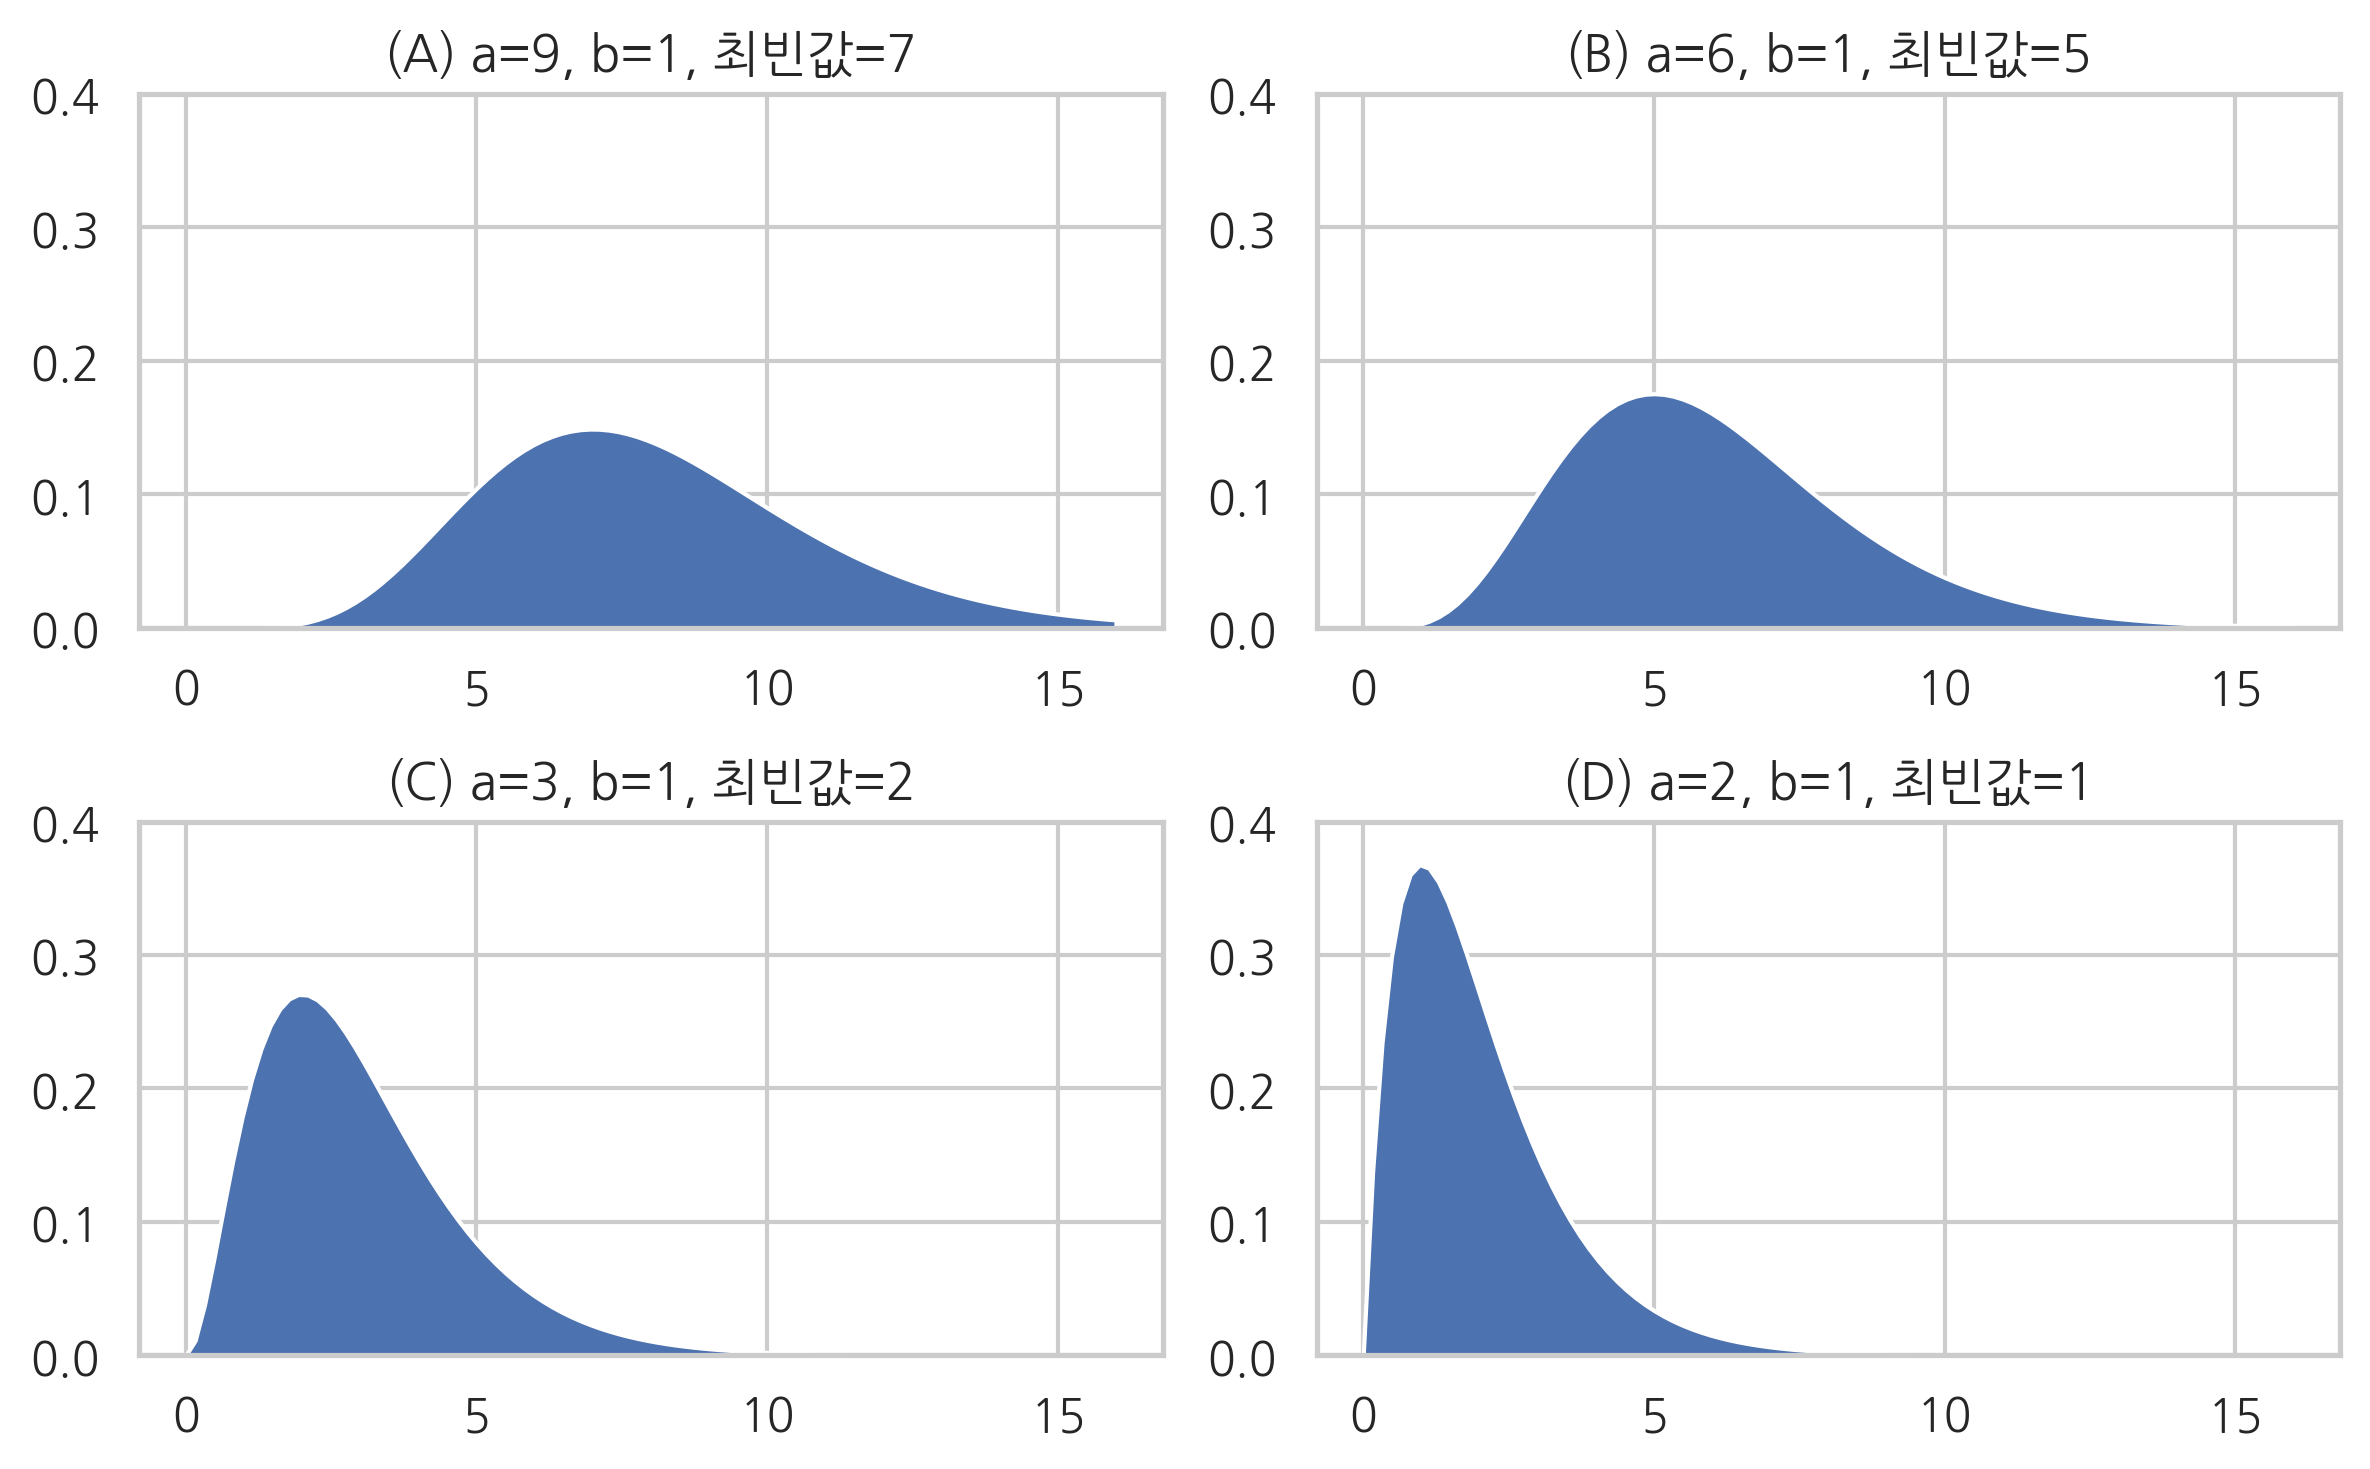

In [2]:
xx = np.linspace(0, 16, 100)
plt.subplot(221)
plt.fill_between(xx, sp.stats.gamma(8).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=9, b=1, 최빈값=7")
plt.subplot(222)
plt.fill_between(xx, sp.stats.gamma(6).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(B) a=6, b=1, 최빈값=5")
plt.subplot(223)
plt.fill_between(xx, sp.stats.gamma(3).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(C) a=3, b=1, 최빈값=2")
plt.subplot(224)
plt.fill_between(xx, sp.stats.gamma(2).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(D) a=2, b=1, 최빈값=1")
plt.tight_layout()
plt.show()

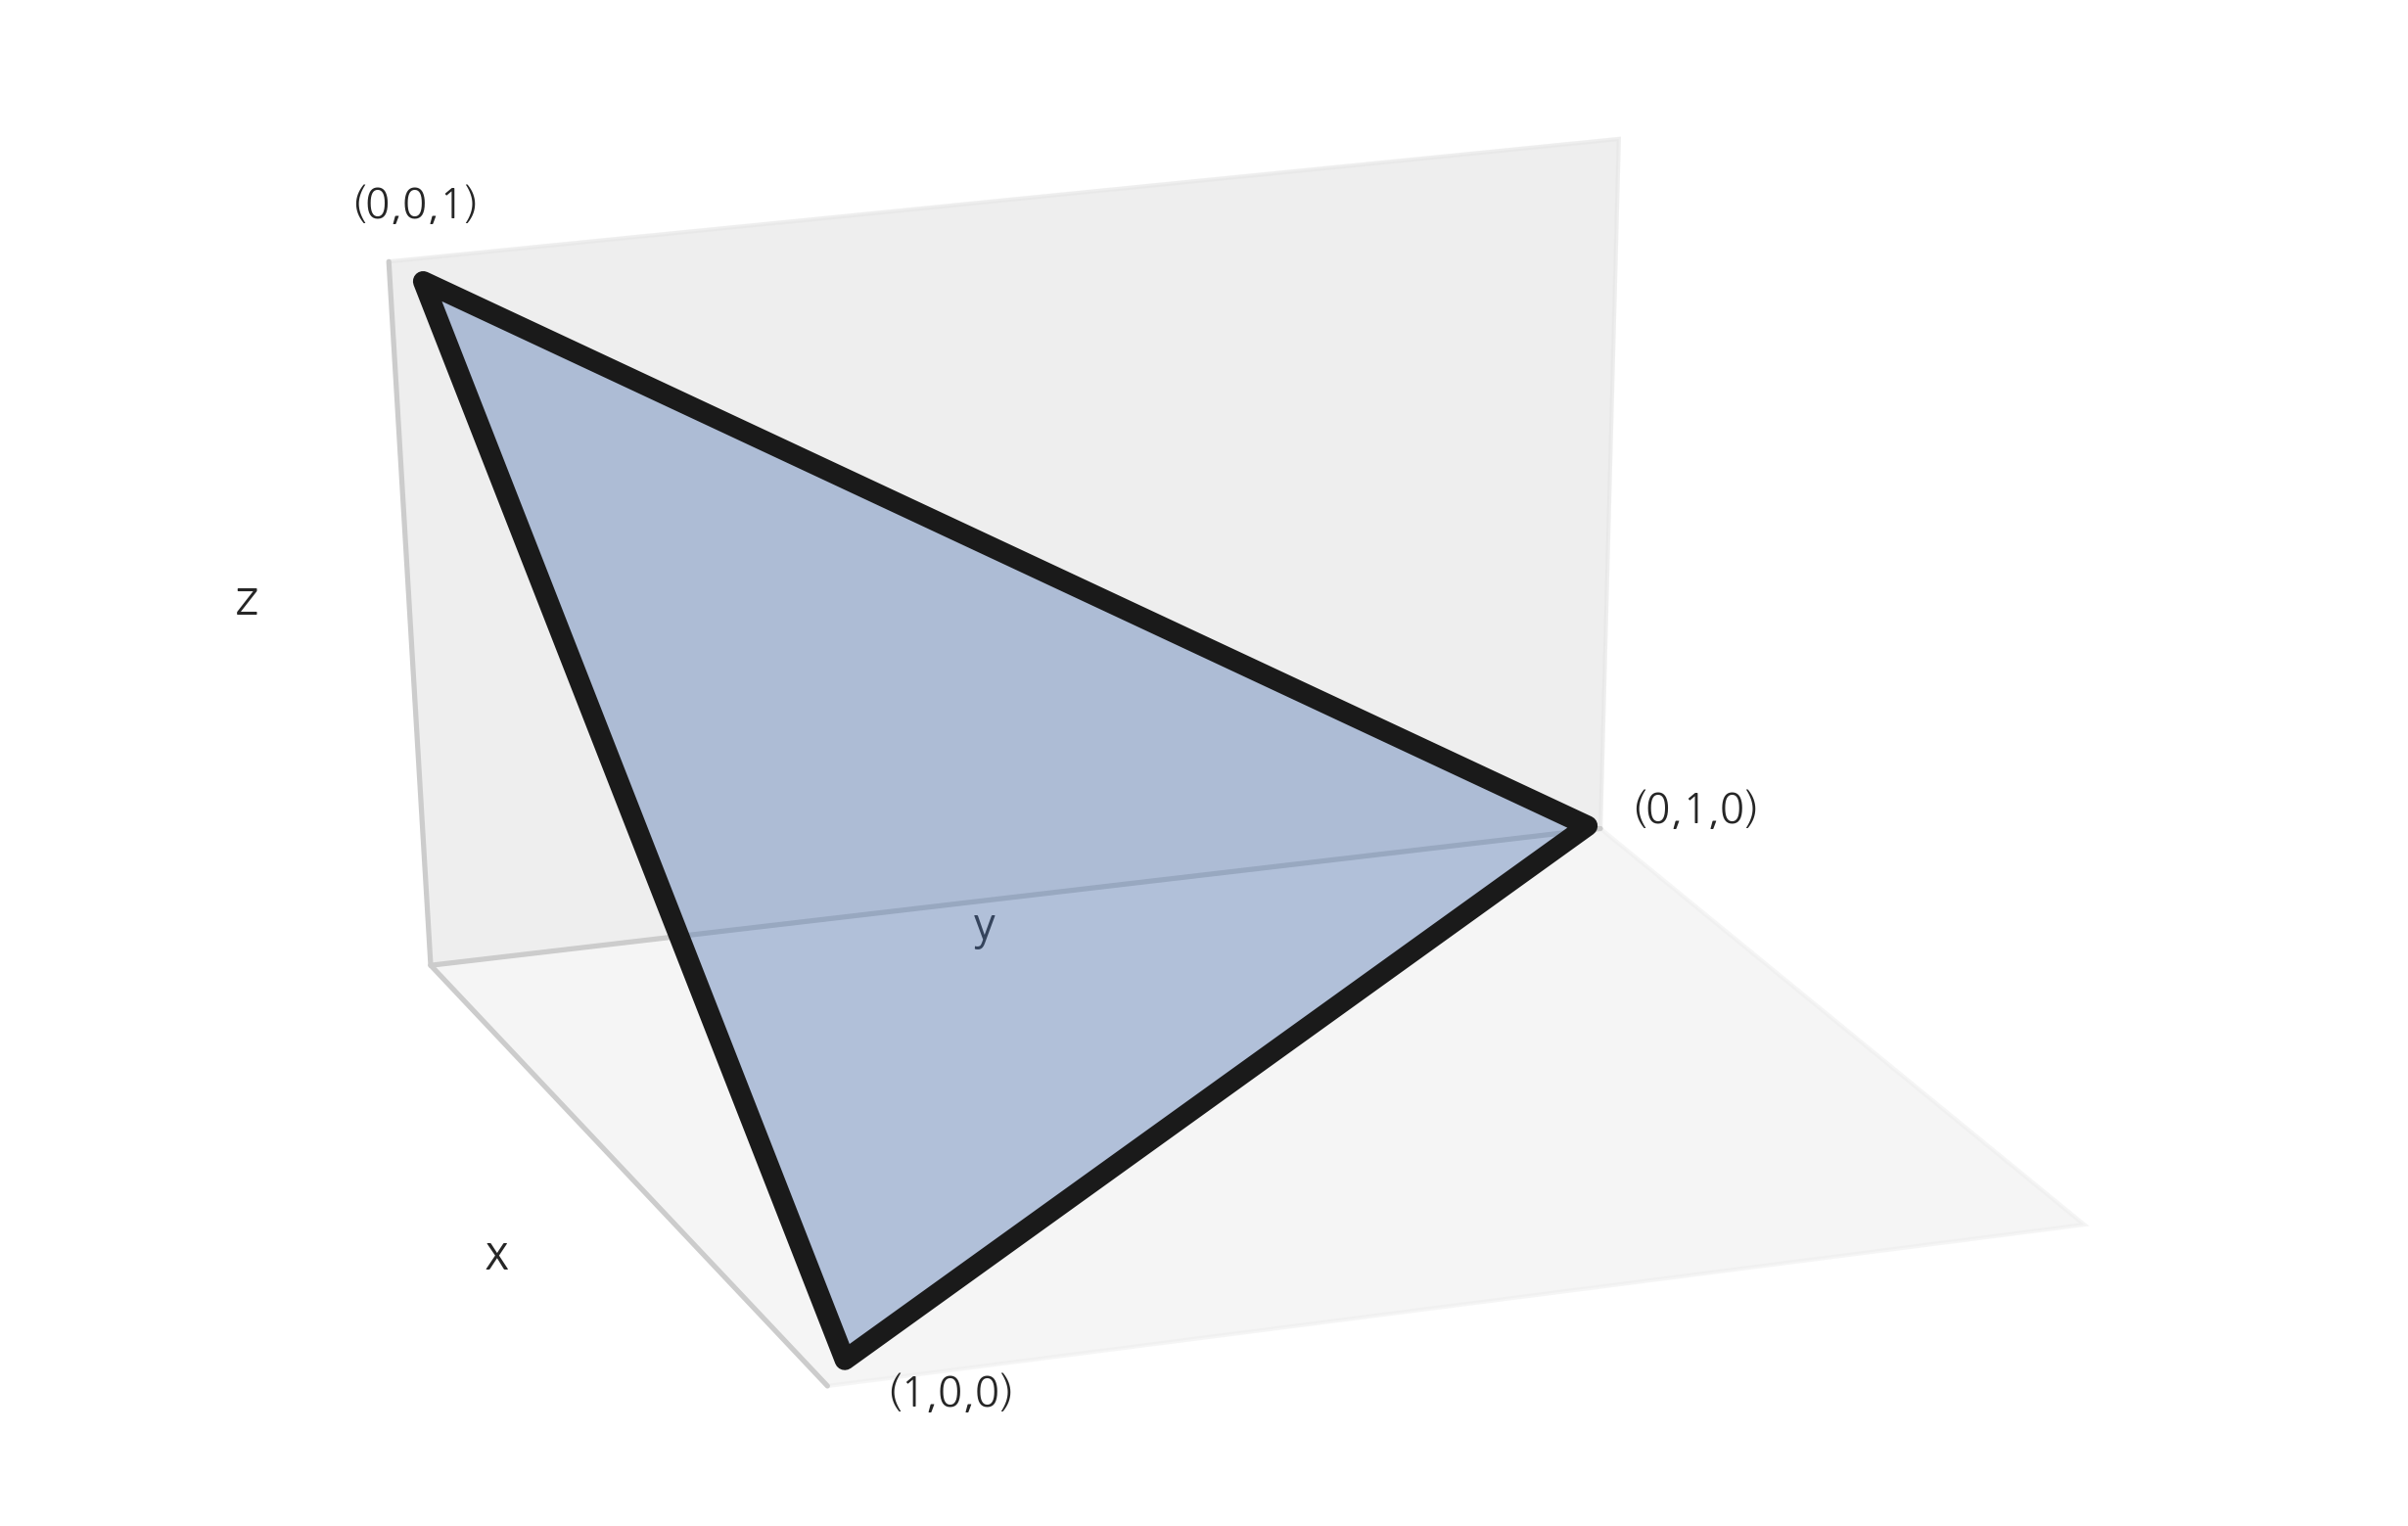

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = Axes3D(fig)

x = [1, 0, 0]
y = [0, 1, 0]
z = [0, 0, 1]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, edgecolor="k", lw=5, alpha=0.4))
ax.text(1, 0, 0, "(1,0,0)", position=(1.1, 0))
ax.text(0, 1, 0, "(0,1,0)", position=(0, 1.04))
ax.text(0, 0, 1, "(0,0,1)", position=(-0.2, 0))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(30, -20)
tmp_planes = ax.zaxis._PLANES

# set origin 
# http://stackoverflow.com/questions/15042129/changing-position-of-vertical-z-axis-of-3d-plot-matplotlib 참조
ax.yaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5],
)
ax.zaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5],
)

In [4]:
def plot_triangle(X, kind):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)

    X1 = (X - n12).dot(m1)
    X2 = (X - n12).dot(m2)

    sns.jointplot(X1, X2, kind=kind, xlim=(-0.8, 0.8), ylim=(-0.1, 1.25))
    plt.show()

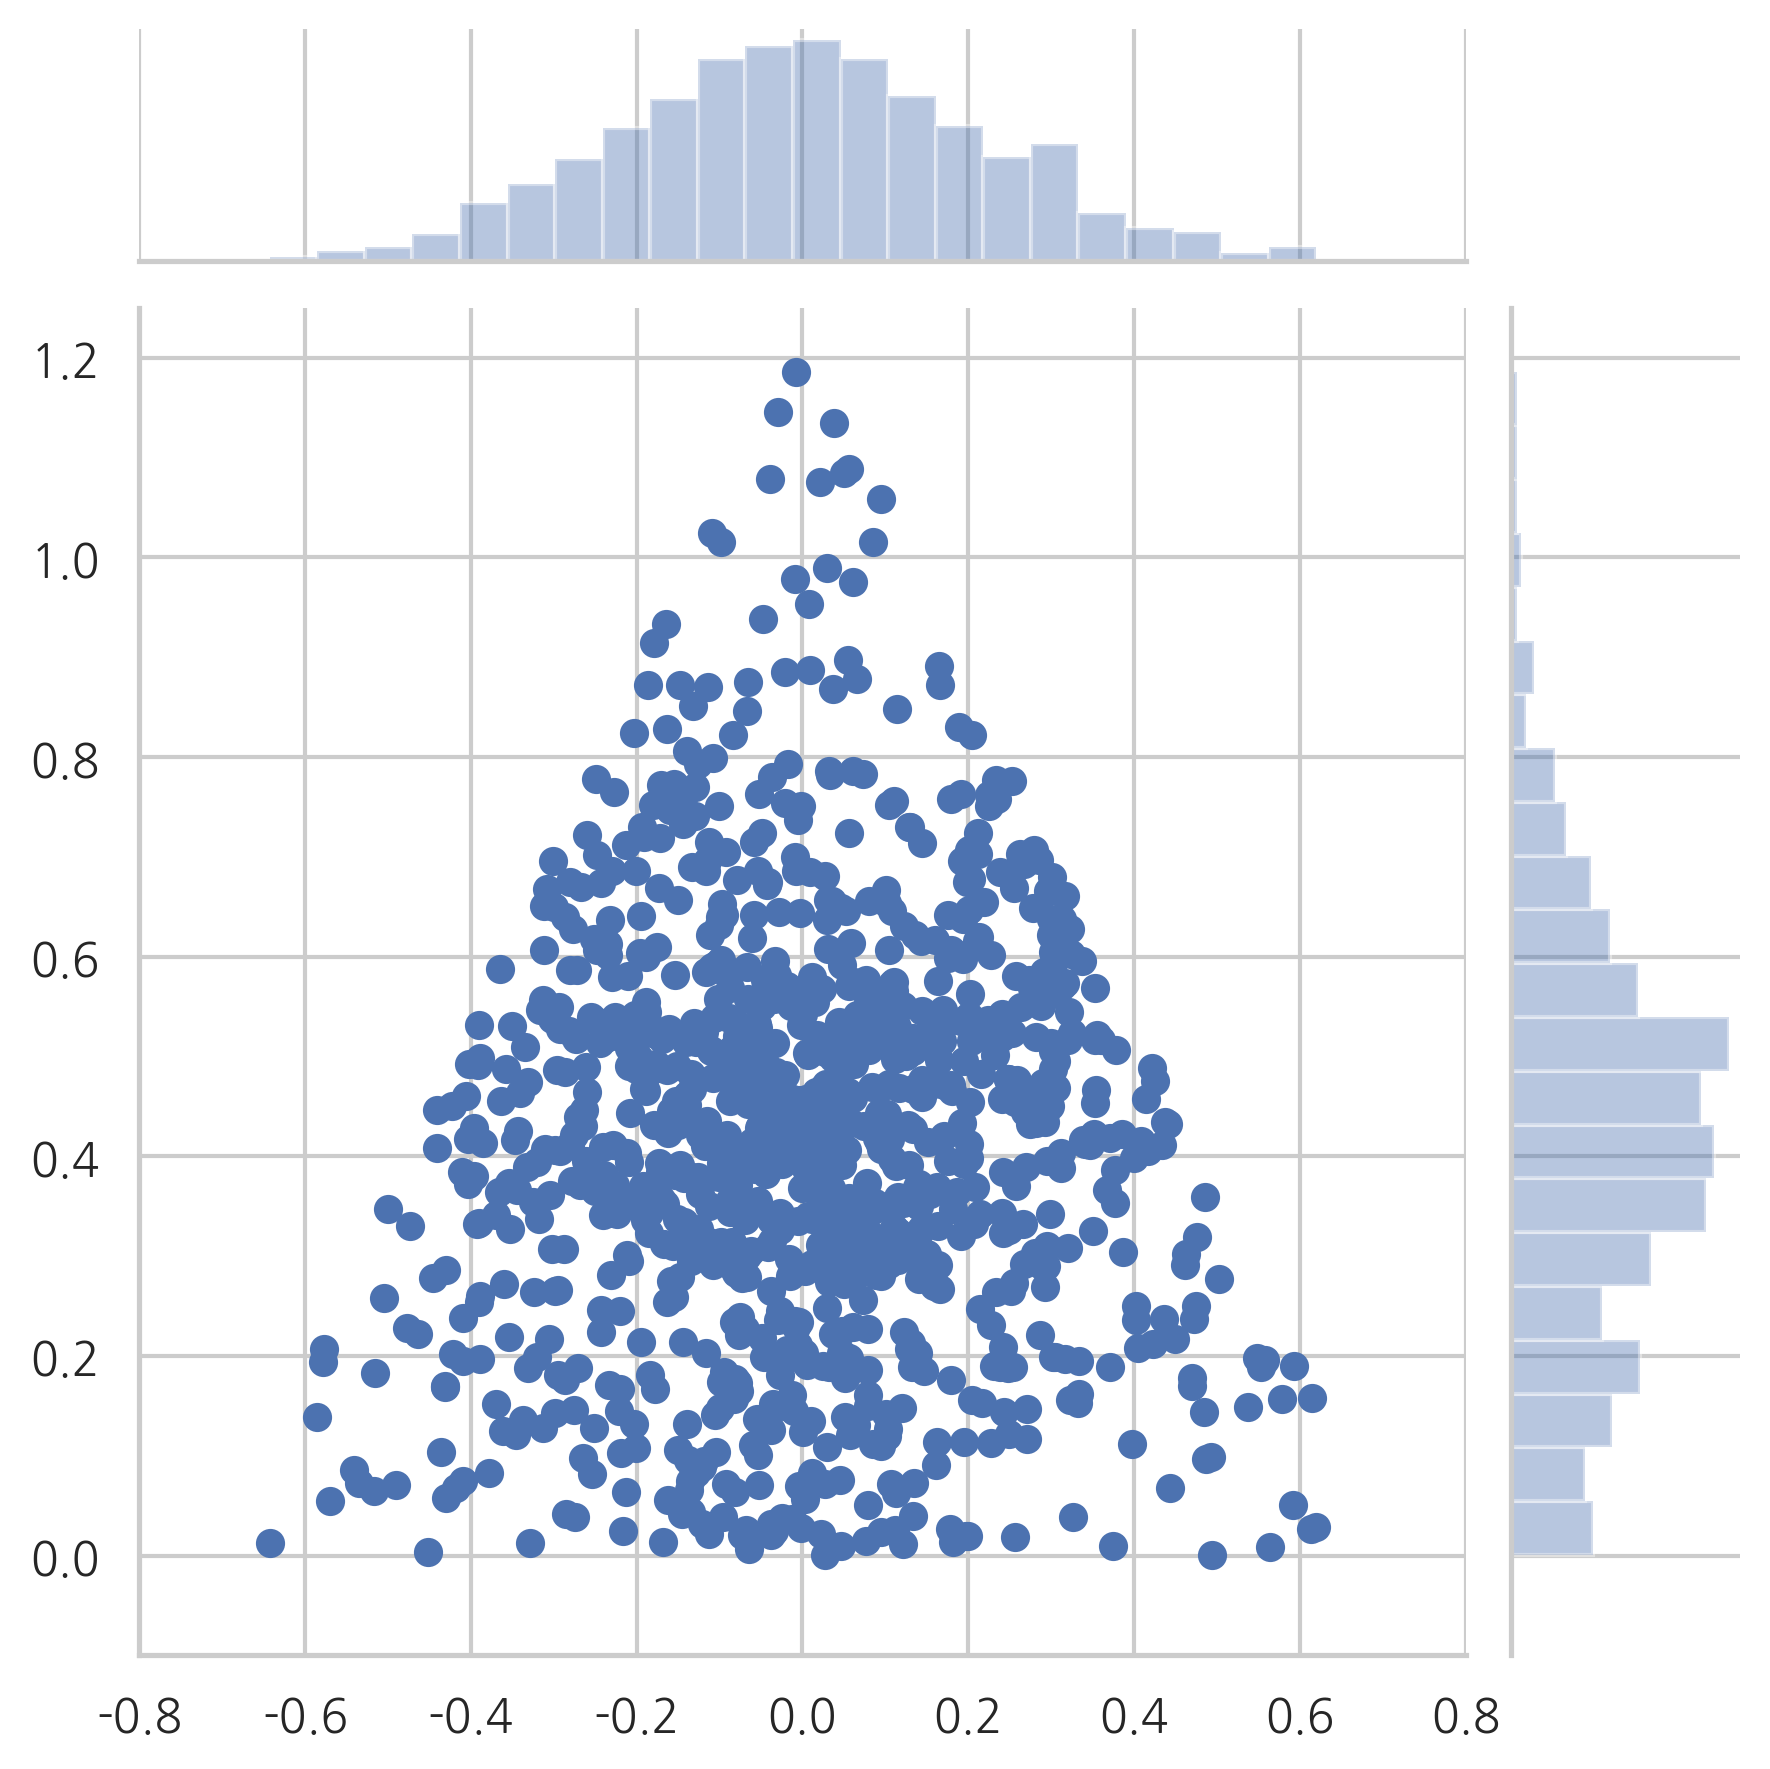

In [5]:
np.random.seed(0)
X1 = np.random.rand(1000, 3)
X1 = X1 / X1.sum(axis=1)[:, np.newaxis]
plot_triangle(X1, kind="scatter")

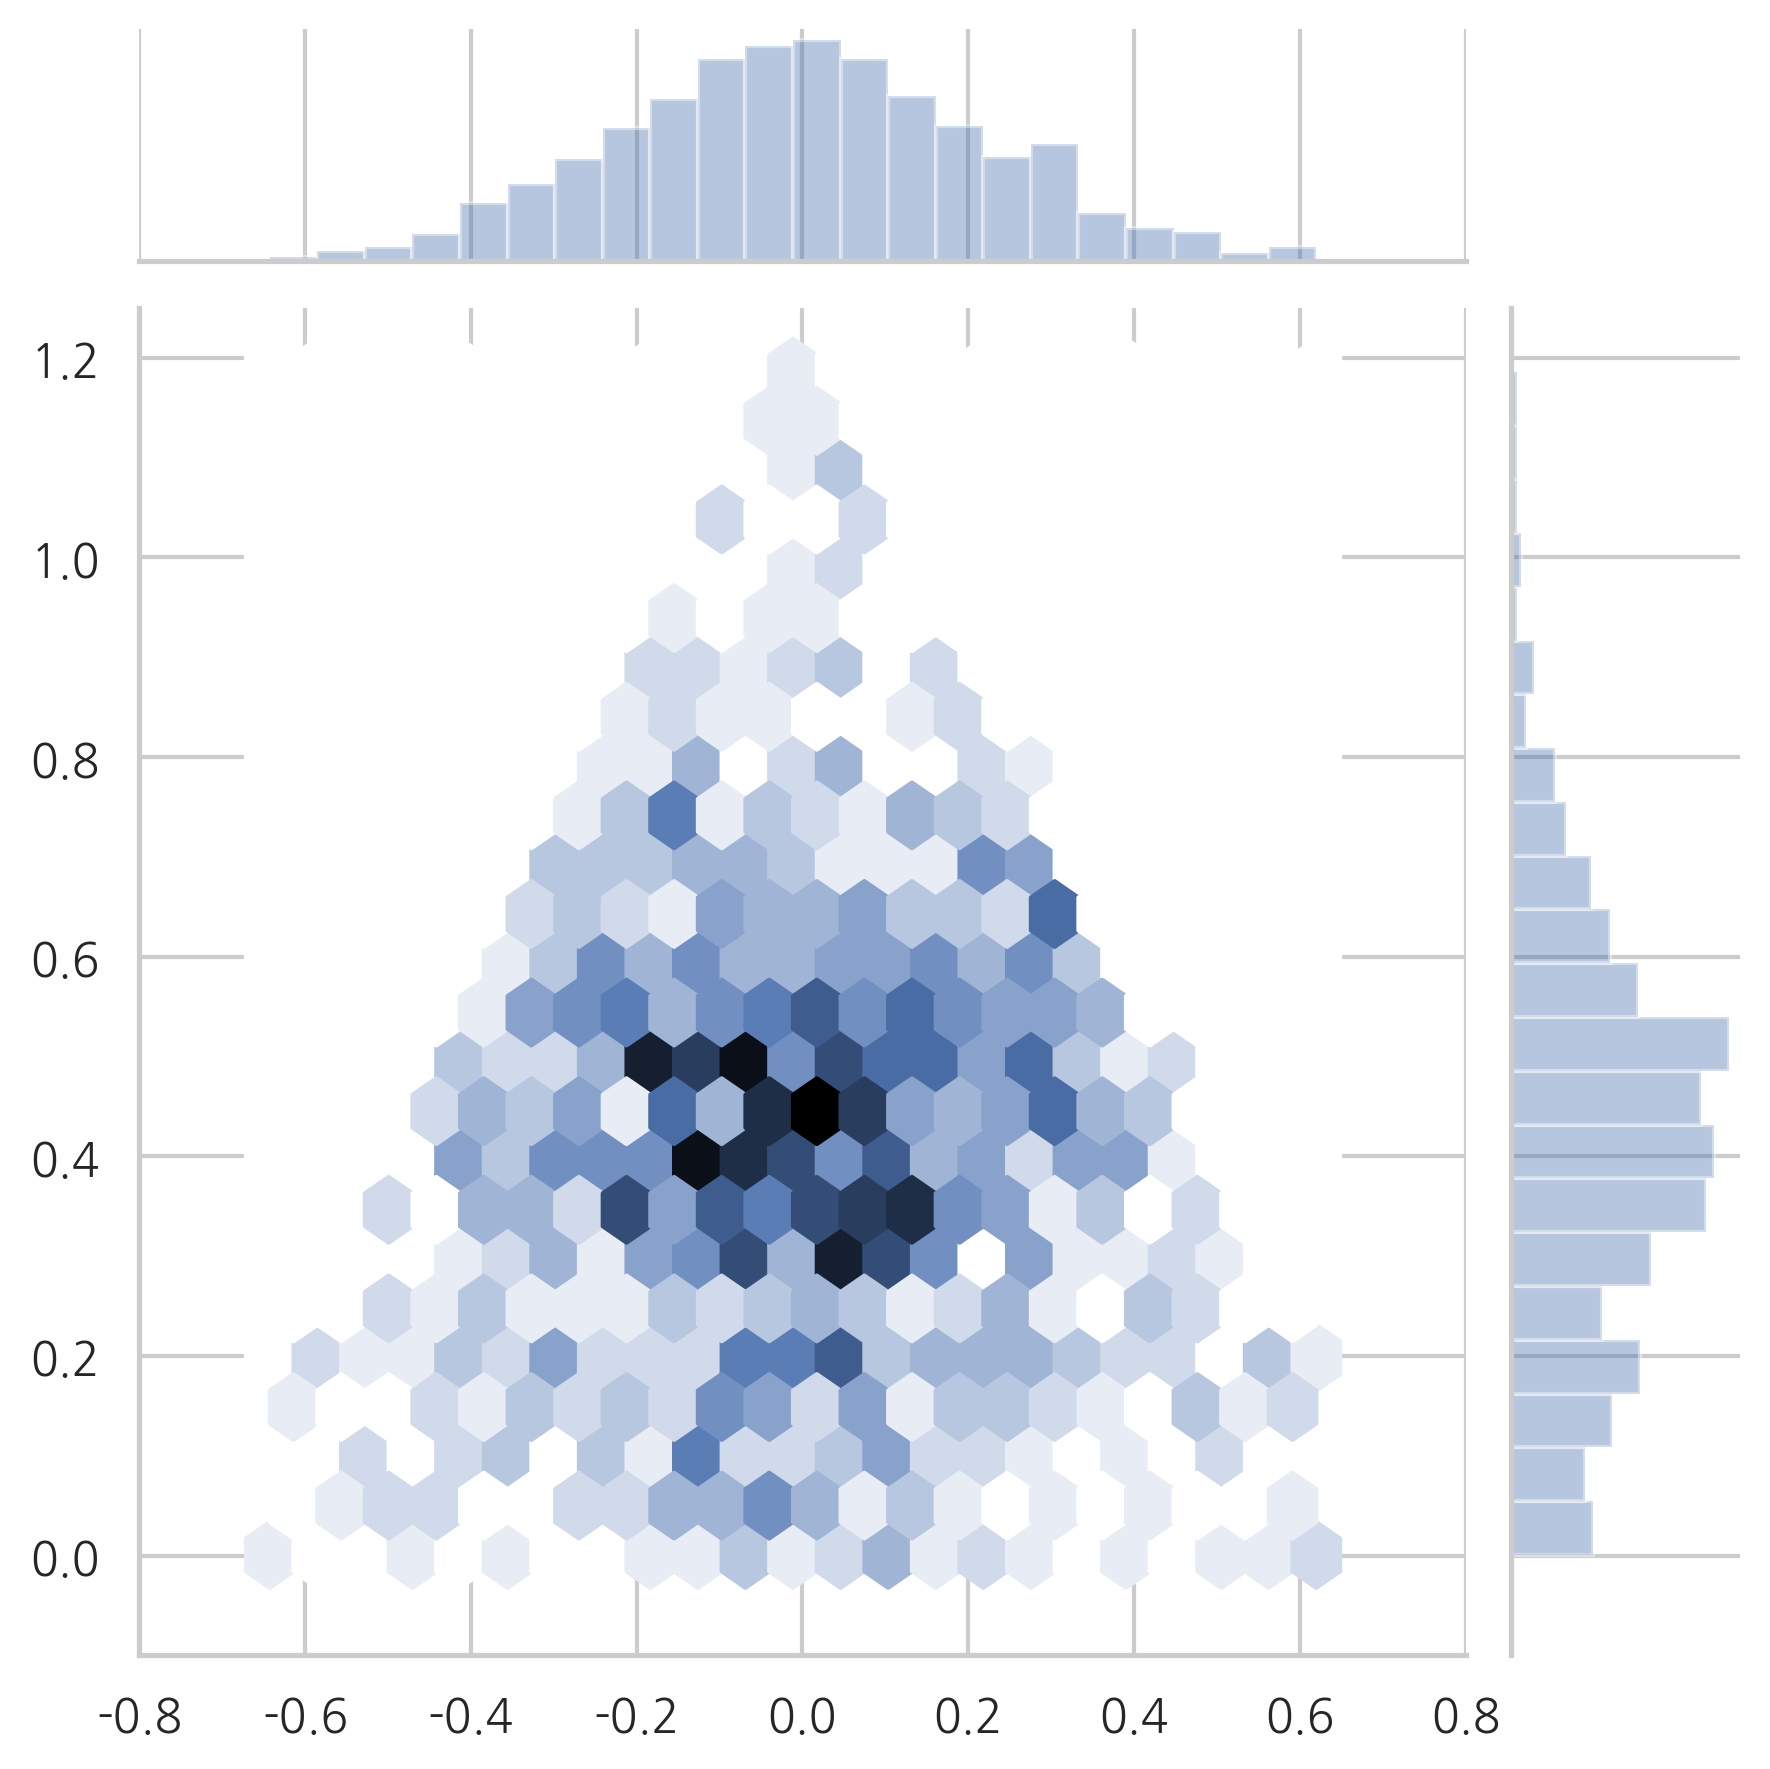

In [6]:
plot_triangle(X1, kind="hex")

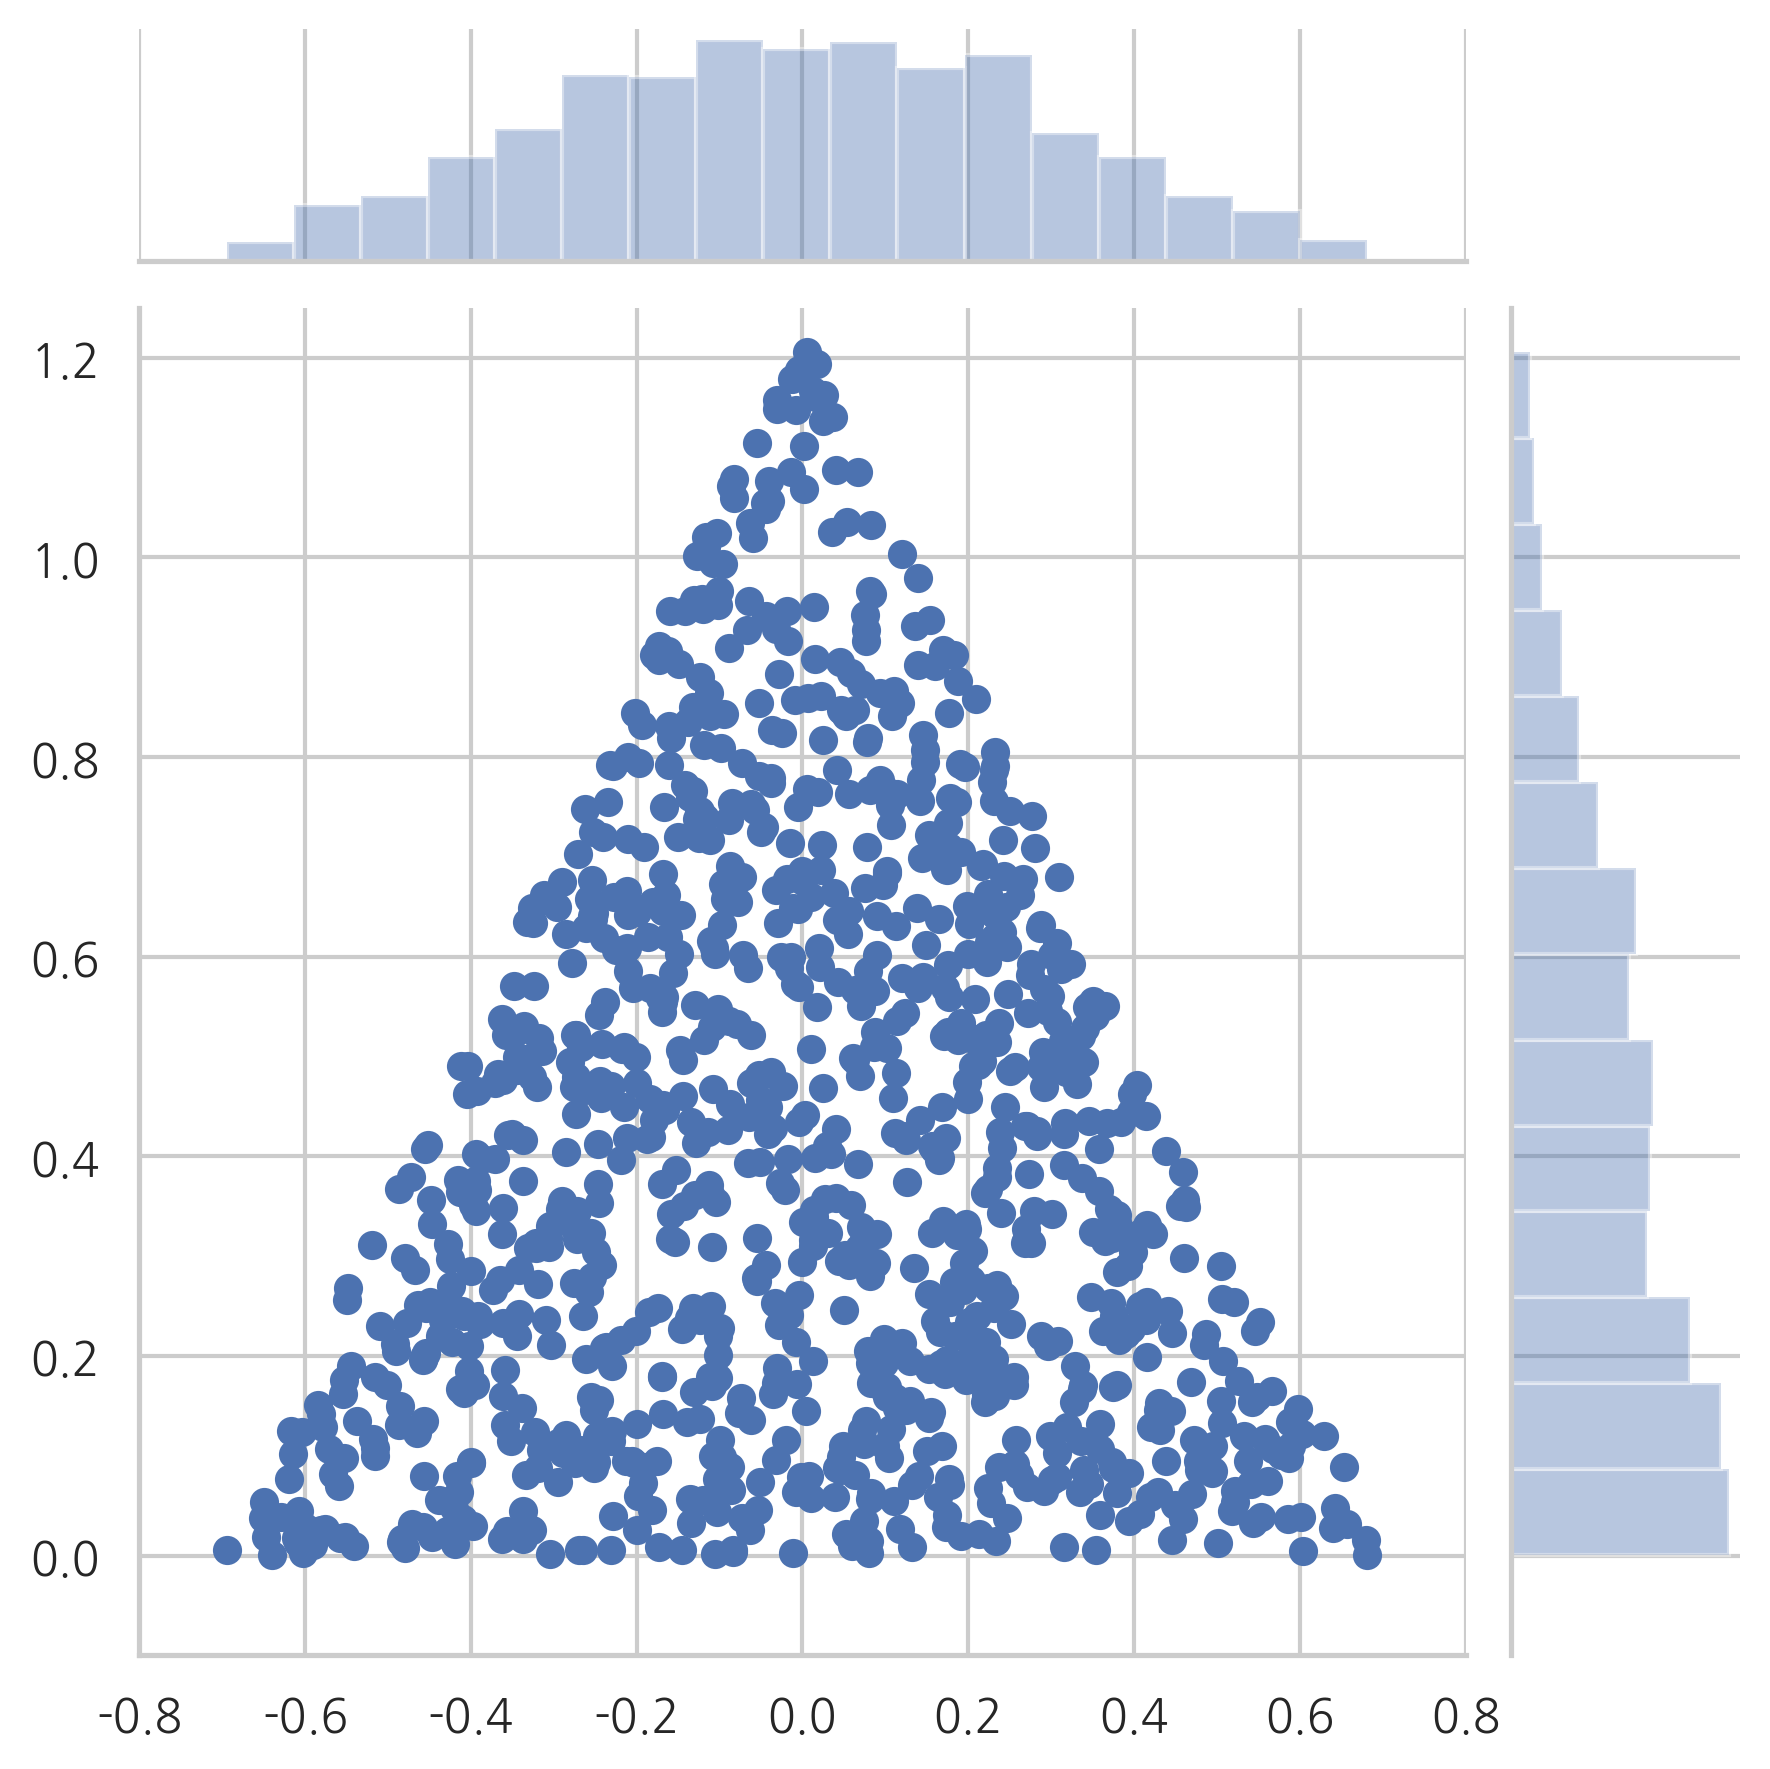

In [7]:
X2 = sp.stats.dirichlet((1, 1, 1)).rvs(1000)
plot_triangle(X2, kind="scatter")

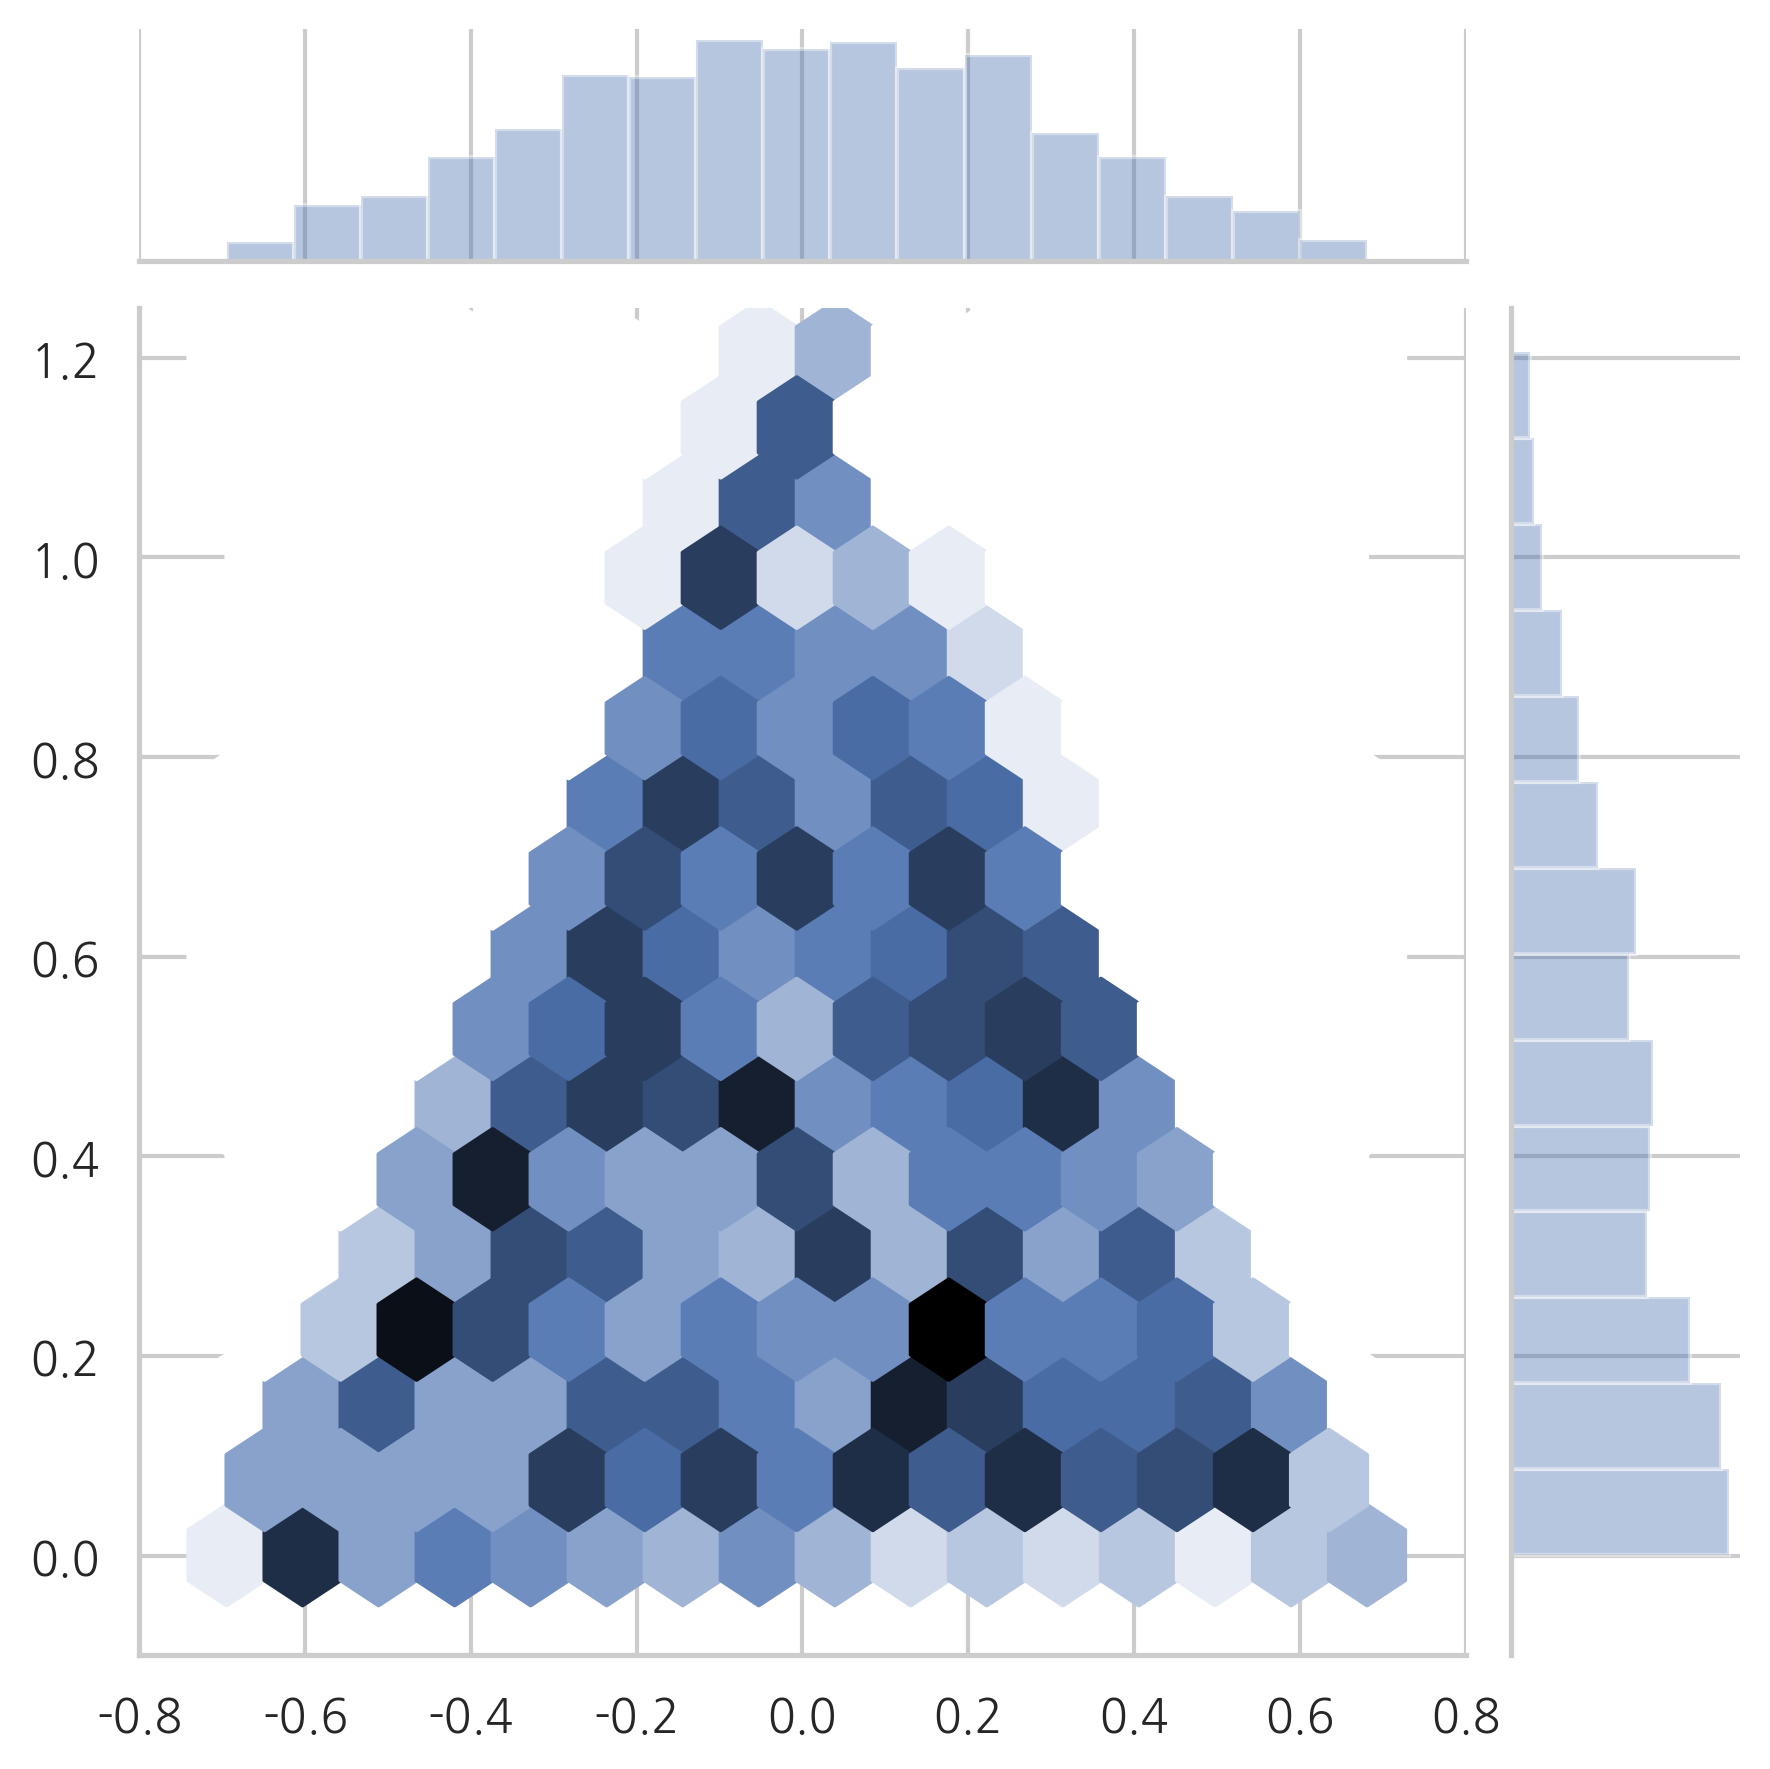

In [8]:
plot_triangle(X2, kind="hex")

In [9]:
def project(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    return np.dstack([(x - n12).dot(m1), (x - n12).dot(m2)])[0]


def project_reverse(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12


eps = np.finfo(float).eps * 10
X = project([[1 - eps, 0, 0], [0, 1 - eps, 0], [0, 0, 1 - eps]])

import matplotlib.tri as mtri
triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=6)
XYZ = project_reverse(np.dstack([triang2.x, triang2.y, 1 - triang2.x - triang2.y])[0])

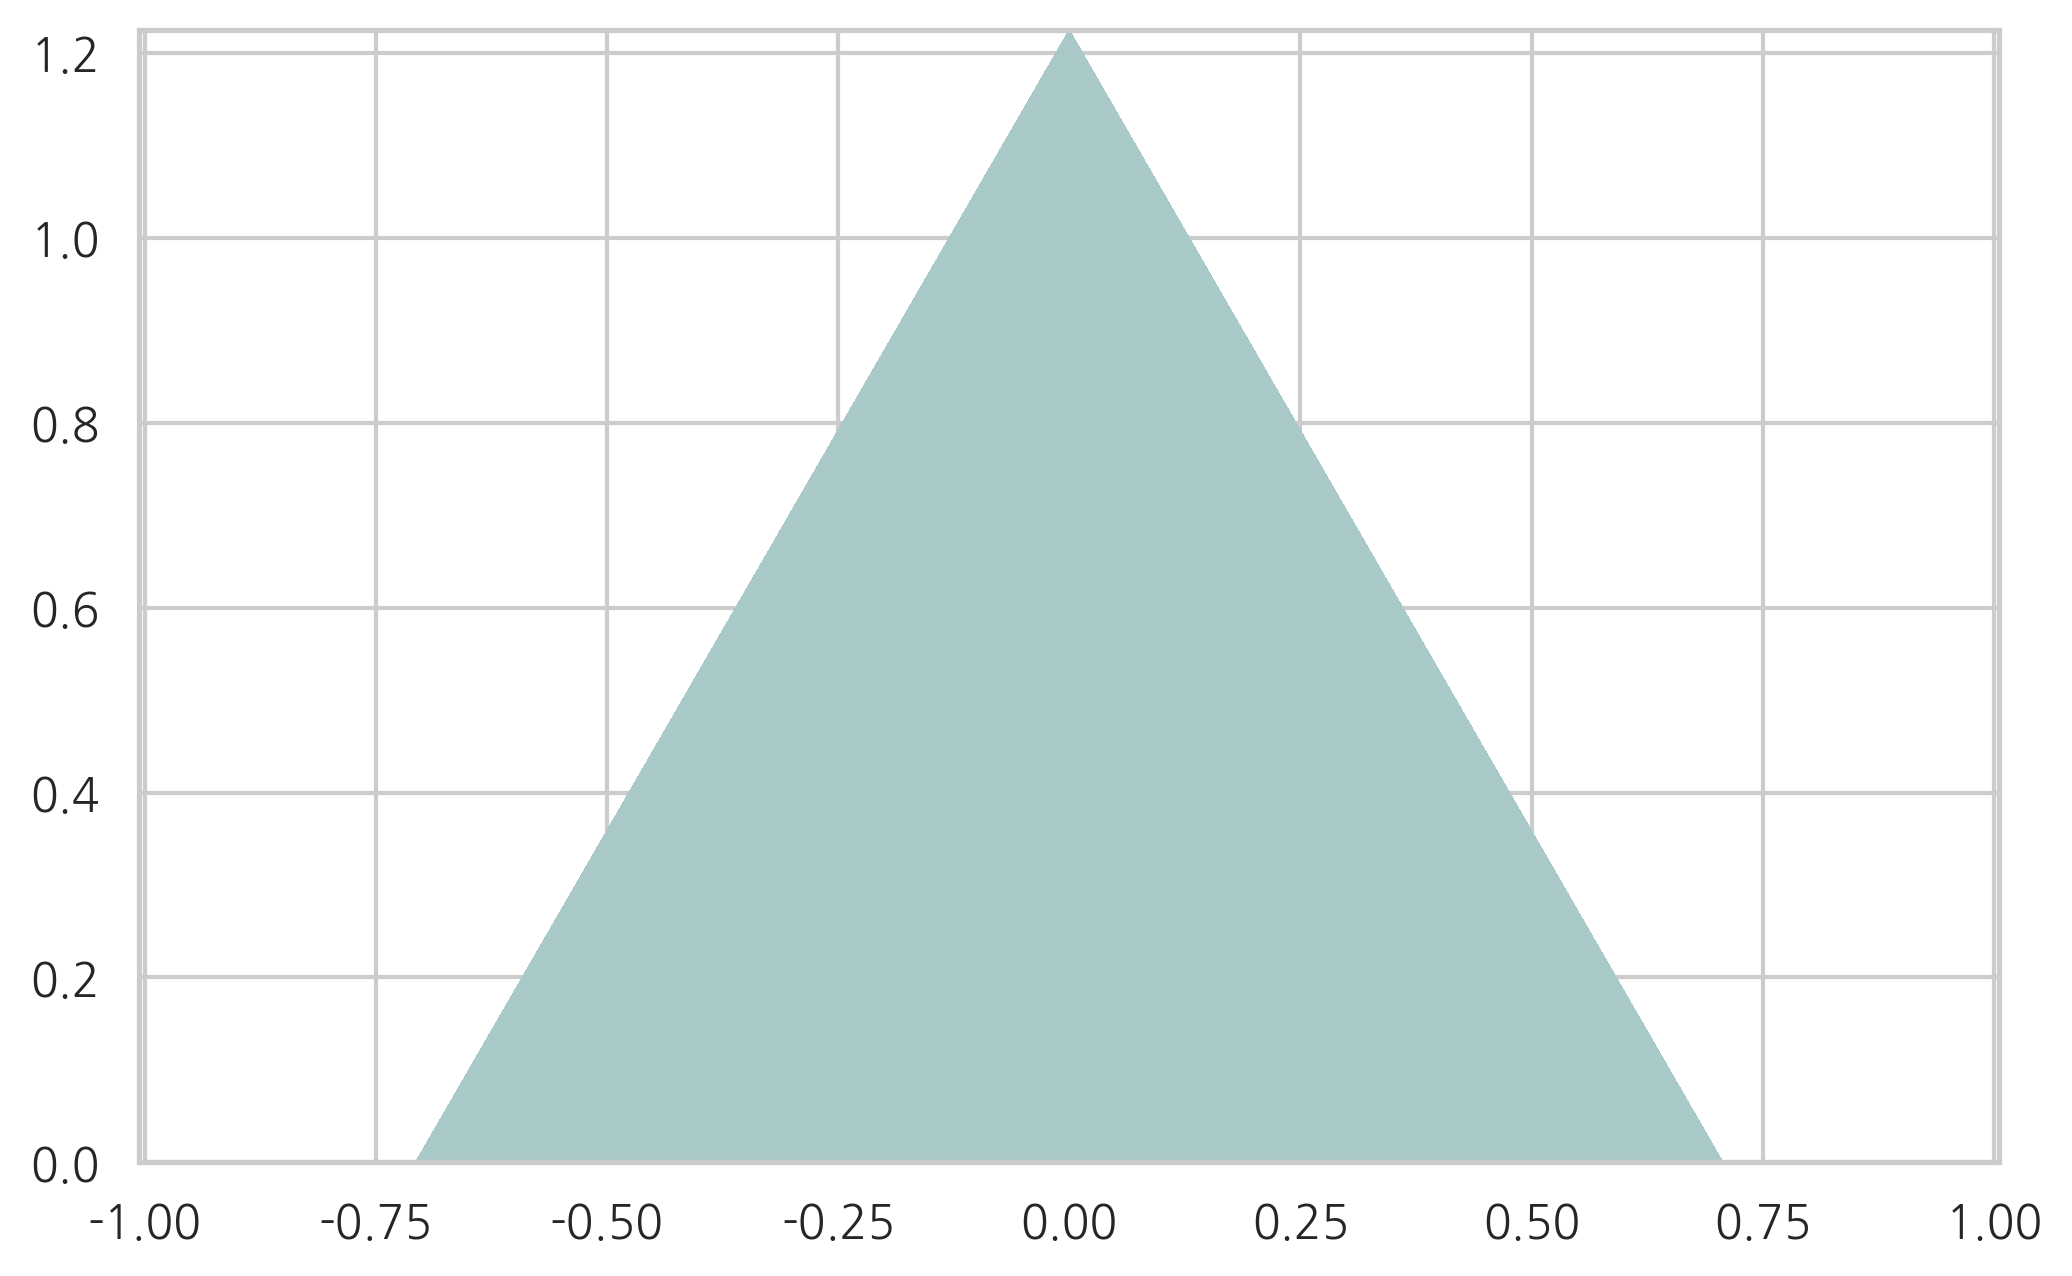

In [10]:
pdf = sp.stats.dirichlet((1, 1, 1)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone)
plt.axis("equal")
plt.show()

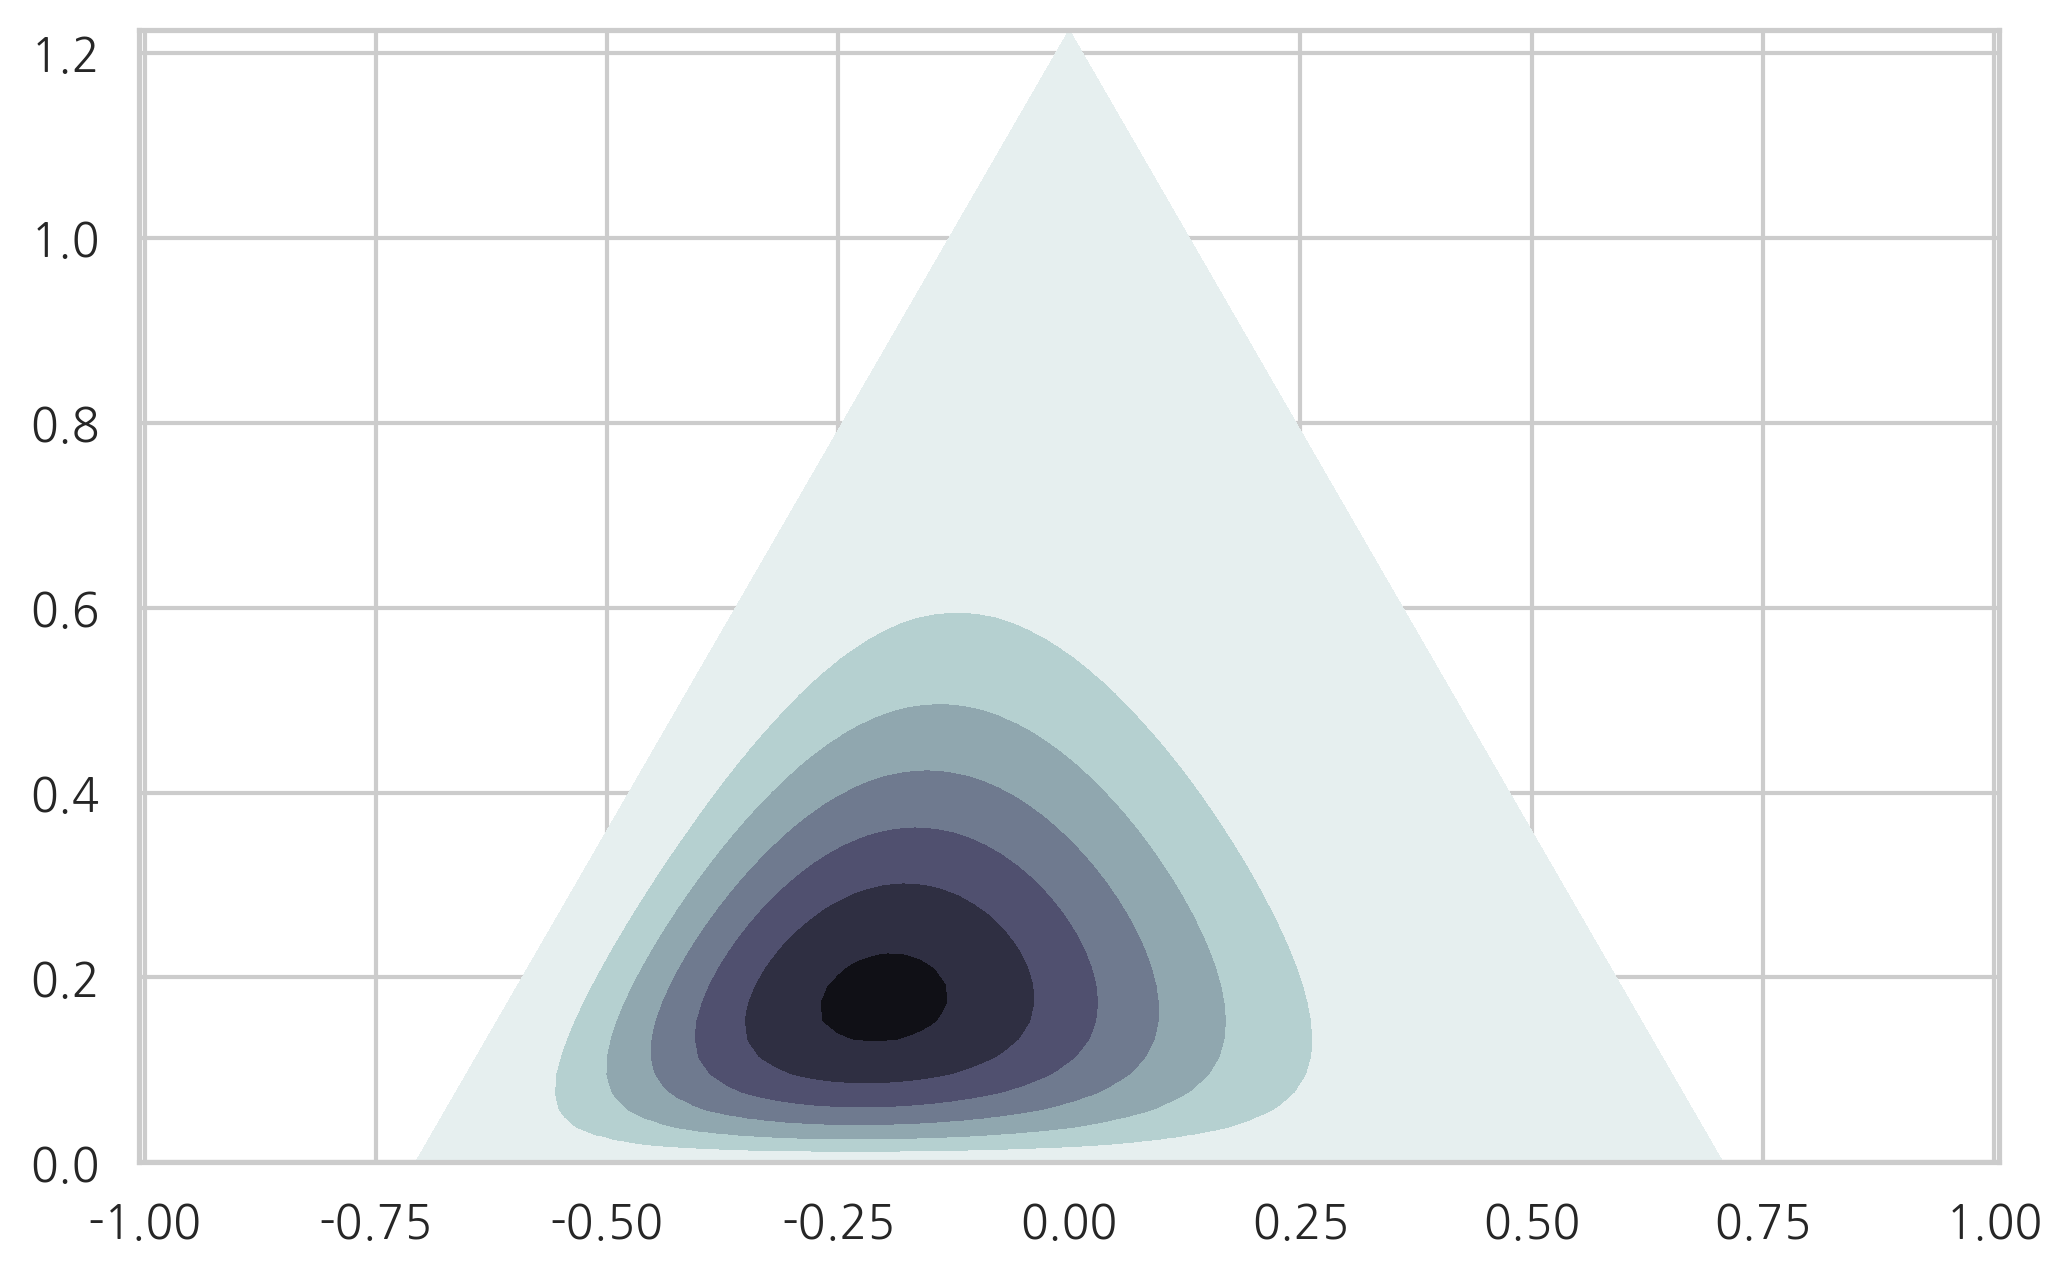

In [11]:
pdf = sp.stats.dirichlet((3, 5, 2)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis("equal")
plt.show()

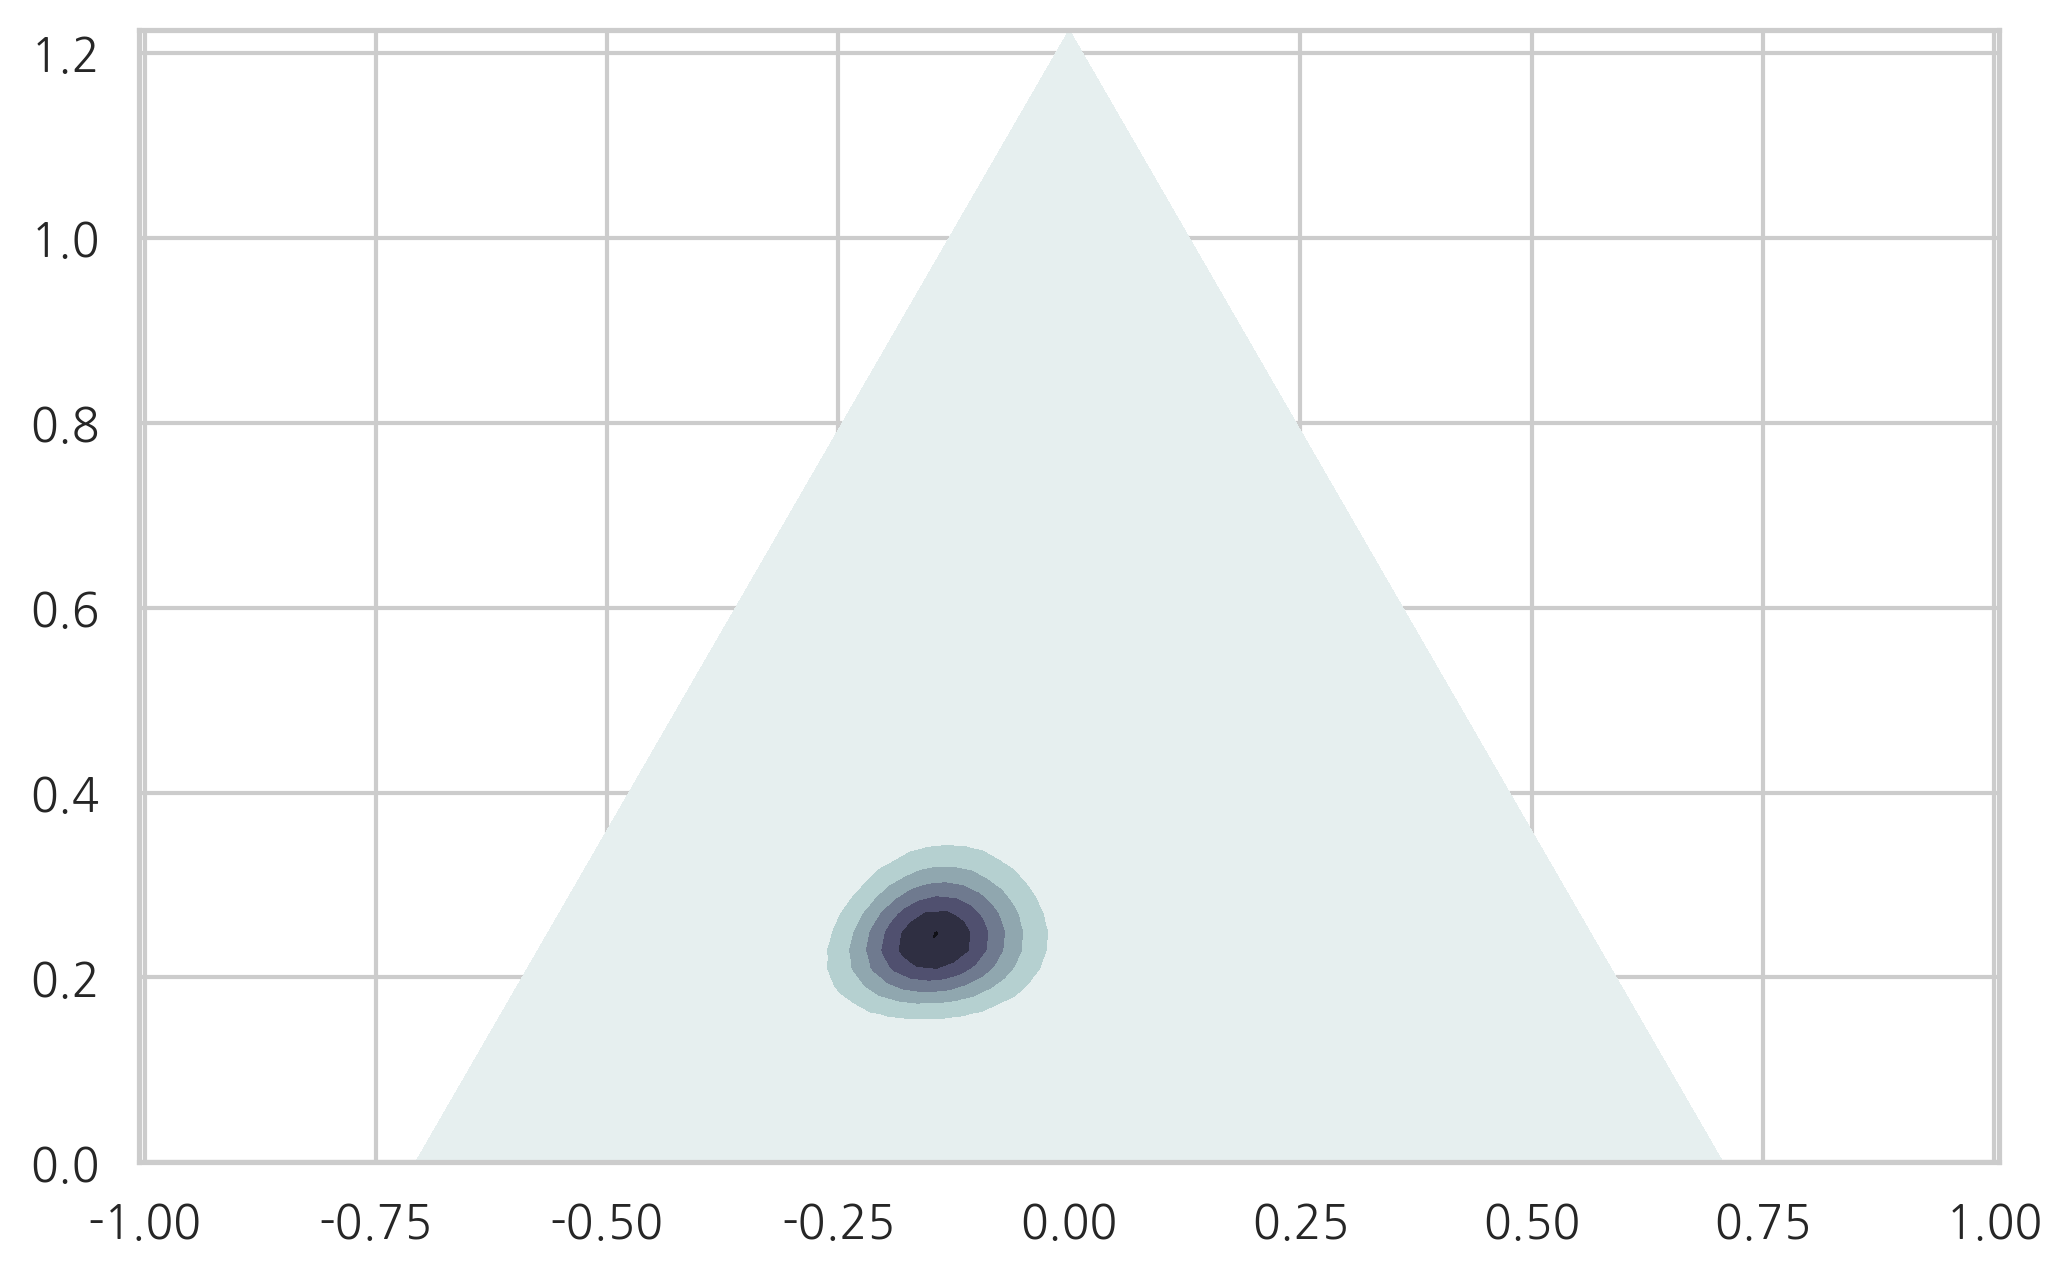

In [12]:
pdf = sp.stats.dirichlet((30, 50, 20)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis("equal")
plt.show()